### 6 Hourly Precipitation data for CONUS- Extremes

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from intake import open_catalog
import cartopy.io.shapereader as shpreader
import mygrads as mg
import Ngl
import Nio
import fiona

In [2]:
DS=xr.open_dataset('/project/xprecip/merra2_ncfiles/precip/resampled/all_merra_precip_6hourly_7-12.nc')
print(DS)
precip=DS.PRECTOTCORR
print(precip)
ts_1=DS.time


<xarray.Dataset>
Dimensions:      (lat: 55, lon: 107, time: 60996)
Coordinates:
  * time         (time) datetime64[ns] 1980-01-01 ... 2021-09-30T18:00:00
  * lon          (lon) float64 -126.9 -126.2 -125.6 ... -61.88 -61.25 -60.62
  * lat          (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
Data variables:
    PRECTOTCORR  (time, lat, lon) float32 ...
<xarray.DataArray 'PRECTOTCORR' (time: 60996, lat: 55, lon: 107)>
[358961460 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2021-09-30T18:00:00
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0


In [3]:
data_lat=DS.lat.values
data_lon=DS.lon.values
nlats=len(data_lat)
nlons=len(data_lon)

### Data for Washington, D.C.

In [4]:
dc_precip=precip.sel(lat=38.8512,lon=-77.0402,method='nearest')
dc_precip

<xarray.DataArray 'PRECTOTCORR' (time: 60996)>
array([4.158096e-11, 2.424159e-10, 7.197286e-08, ..., 0.000000e+00,
       0.000000e+00, 0.000000e+00], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2021-09-30T18:00:00
    lon      float64 -76.88
    lat      float64 39.0

In [5]:
jan_precip=dc_precip.loc['1980-01-01':'1980-01-31']
jan_precip

<xarray.DataArray 'PRECTOTCORR' (time: 124)>
array([4.158096e-11, 2.424159e-10, 7.197286e-08, 4.031172e-07, 2.517172e-07,
       1.271983e-07, 1.610481e-10, 1.172076e-10, 1.796806e-09, 9.349606e-09,
       2.982356e-05, 1.031570e-04, 2.749590e-05, 3.679367e-04, 3.396273e-04,
       6.529987e-04, 7.027984e-04, 1.017928e-03, 2.025738e-04, 1.374446e-04,
       1.891598e-05, 1.714174e-08, 0.000000e+00, 2.792756e-06, 8.064485e-05,
       2.348945e-04, 5.520741e-05, 1.483364e-05, 4.383590e-06, 3.463865e-08,
       3.175566e-07, 1.755088e-07, 5.907423e-07, 7.256959e-05, 1.262035e-05,
       1.465123e-07, 1.069577e-09, 2.773004e-12, 1.286435e-08, 1.386739e-06,
       2.112061e-06, 1.940473e-03, 7.571559e-05, 2.155565e-04, 1.400411e-03,
       4.527259e-06, 5.937454e-08, 1.629342e-07, 3.774585e-08, 9.085226e-06,
       2.697925e-05, 3.918645e-05, 3.576875e-04, 2.839863e-04, 1.922417e-04,
       3.446639e-04, 9.338930e-05, 4.702073e-06, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 1.648459e-09, 1.236749e-07, 3.344140e-06,
       2.261024e-06, 2.235264e-06, 3.587746e-06, 8.714991e-04, 3.635883e-03,
       1.302838e-03, 9.091496e-04, 7.777251e-04, 1.961762e-07, 1.721957e-06,
       3.270106e-07, 1.210828e-07, 1.502136e-06, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 1.221258e-08, 0.000000e+00, 4.384177e-08,
       1.496242e-03, 2.929289e-05, 9.520501e-04, 1.153648e-04, 8.666329e-05,
       3.019720e-05, 1.624774e-05, 3.619993e-06, 4.856891e-06, 1.180220e-06,
       8.547679e-05, 2.048508e-05, 6.230039e-07, 9.838957e-06, 6.376649e-07,
       1.111330e-07, 2.359729e-08, 8.885166e-09, 8.559420e-11, 2.219736e-09,
       2.596068e-06, 0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       9.944129e-14, 9.638068e-11, 3.890580e-09, 9.666451e-09, 1.345048e-06,
       6.326627e-08, 3.714035e-09, 2.865590e-09, 4.517322e-06, 7.300550e-07,
       8.247833e-05, 2.483577e-04, 1.546508e-05, 1.675333e-06], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 1980-01-31T18:00:00
    lon      float64 -76.88
    lat      float64 39.0

In [6]:
#2016
july_precip_2018=dc_precip.loc['2018-07-01':'2018-07-31']
july_precip_2018

<xarray.DataArray 'PRECTOTCORR' (time: 124)>
array([1.508479e-24, 9.094947e-11, 3.943889e-06, 9.630307e-07, 3.035439e-09,
       9.429176e-06, 9.503819e-07, 3.302353e-06, 1.414073e-07, 1.328099e-07,
       3.083423e-04, 3.140271e-04, 1.382250e-04, 6.321818e-05, 1.424295e-05,
       6.899354e-06, 1.844624e-05, 4.802644e-05, 1.223795e-04, 5.819462e-05,
       2.041981e-04, 1.536142e-04, 1.548175e-04, 3.616110e-05, 3.395653e-07,
       7.470245e-09, 2.162702e-08, 3.854393e-09, 3.551933e-14, 1.253720e-06,
       1.223690e-35, 3.764080e-35, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 8.819370e-09, 1.891542e-14, 5.676998e-13,
       4.567069e-06, 6.093737e-05, 2.314191e-07, 2.855171e-08, 2.631463e-07,
       1.950713e-06, 7.918061e-08, 3.260084e-08, 4.067317e-09, 6.412120e-08,
       6.394760e-10, 1.955858e-10, 5.649170e-11, 5.298401e-12, 1.532845e-14,
       1.156109e-19, 5.310260e-15, 8.576220e-10, 1.175294e-05, 3.514066e-05,
       7.720292e-05, 2.722256e-05, 4.679561e-04, 4.380662e-04, 2.317699e-06,
       6.109715e-05, 9.506270e-04, 5.305827e-03, 7.072091e-05, 2.267523e-06,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00, 1.747503e-08,
       8.323696e-09, 5.074213e-09, 6.019586e-05, 1.274066e-07, 1.346928e-08,
       9.288073e-08, 8.109282e-05, 6.103575e-03, 1.976967e-02, 2.256677e-03,
       2.023857e-05, 1.080036e-03, 3.399611e-03, 1.439869e-03, 1.553833e-03,
       1.533628e-03, 4.873574e-04, 8.358359e-04, 3.378034e-03, 1.220822e-03,
       3.079534e-03, 8.407235e-04, 5.186535e-04, 1.493260e-03, 1.207024e-03,
       1.904562e-03, 1.088418e-04, 1.417706e-05, 4.895235e-06, 2.919214e-07,
       1.269637e-05, 4.573613e-04, 8.856952e-04, 6.421804e-04, 1.076516e-04,
       3.860623e-06, 2.439955e-06, 5.876117e-10, 1.273590e-08, 1.456725e-07,
       1.143984e-06, 3.206806e-07, 2.710158e-04, 1.905382e-03, 4.151529e-04,
       1.641288e-04, 2.346188e-04, 1.121432e-03, 6.444007e-04], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2018-07-01 ... 2018-07-31T18:00:00
    lon      float64 -76.88
    lat      float64 39.0

In [7]:
print(np.max(dc_precip))
print(np.mean(dc_precip))

<xarray.DataArray 'PRECTOTCORR' ()>
array(0.01976967)
Coordinates:
    lon      float64 -76.88
    lat      float64 39.0
<xarray.DataArray 'PRECTOTCORR' ()>
array(0.0002134, dtype=float32)
Coordinates:
    lon      float64 -76.88
    lat      float64 39.0


In [17]:
time=dc_precip.time
time

<xarray.DataArray 'time' (time: 60996)>
array(['1980-01-01T00:00:00.000000000', '1980-01-01T06:00:00.000000000',
       '1980-01-01T12:00:00.000000000', ..., '2021-09-30T06:00:00.000000000',
       '2021-09-30T12:00:00.000000000', '2021-09-30T18:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2021-09-30T18:00:00
    lon      float64 -76.88
    lat      float64 39.0

In [18]:
print(time[np.where(dc_precip==np.nanmax(dc_precip))])

<xarray.DataArray 'time' (time: 1)>
array(['2018-07-21T18:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2018-07-21T18:00:00
    lon      float64 -76.88
    lat      float64 39.0


In [9]:
june_2015=dc_precip.loc['2015-06-01':'2015-06-30']
june_2015
print(np.sum(june_2015))

<xarray.DataArray 'PRECTOTCORR' ()>
array(0.06898974, dtype=float32)
Coordinates:
    lon      float64 -76.88
    lat      float64 39.0


In [13]:
year_17=dc_precip.loc['2017-01-01':'2017-12-31']
year_17
print(np.nanmax(year_17))
print(np.nanmean(year_17))

0.009586334
0.00018248407


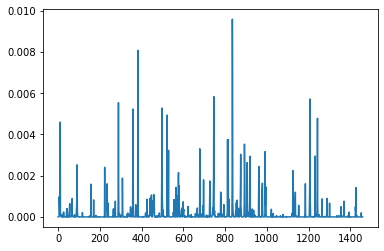

In [12]:
plt.plot(year_17)

In [14]:
hourly_groups=dc_precip.groupby('time.hour')
hourly_groups

DataArrayGroupBy, grouped over 'hour'
4 groups with labels 0, 6, 12, 18.

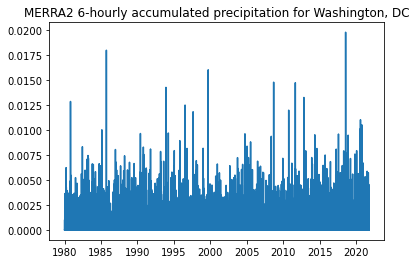

In [5]:
plt.plot(dc_precip['time'],dc_precip)
plt.title('MERRA2 6-hourly accumulated precipitation for Washington, DC')
plt.savefig('/homes/areed29/CLIM997/summer22_research/washington_precip_6hourlysums')
#Washington, DC

### Climatology

In [44]:
ds_daily_climo=precip.groupby('time.dayofyear').mean(dim='time')
ds_daily_climo

<xarray.DataArray 'PRECTOTCORR' (dayofyear: 366, lat: 55, lon: 107)>
array([[[1.35219438e-04, 1.43541562e-04, 1.54191090e-04, ...,
         3.90907735e-05, 4.15558388e-05, 4.23352176e-05],
        [1.12196911e-04, 1.12646856e-04, 1.36188319e-04, ...,
         3.41261257e-05, 3.66345230e-05, 3.88662411e-05],
        [9.13244294e-05, 8.45031245e-05, 1.03663544e-04, ...,
         3.12480843e-05, 3.24545035e-05, 3.39752369e-05],
        ...,
        [6.45828783e-04, 6.36007462e-04, 6.70984562e-04, ...,
         1.80244009e-04, 2.06647746e-04, 2.31174170e-04],
        [6.98034186e-04, 7.02718156e-04, 6.54162955e-04, ...,
         1.58865485e-04, 1.94776410e-04, 2.16097062e-04],
        [6.56966586e-04, 4.84520075e-04, 3.48535308e-04, ...,
         1.53916088e-04, 1.77861351e-04, 1.84983321e-04]],

       [[4.94797641e-05, 5.20178255e-05, 5.37770393e-05, ...,
         3.00849733e-05, 3.42379572e-05, 3.48753092e-05],
        [5.35829022e-05, 5.00592032e-05, 5.07085751e-05, ...,
         3.41423984e-05, 3.53244723e-05, 3.77581346e-05],
        [6.81053571e-05, 5.23486451e-05, 5.00124879e-05, ...,
         3.90051355e-05, 3.71865790e-05, 3.87479813e-05],
...
        [5.94758487e-04, 6.04758970e-04, 6.30009628e-04, ...,
         1.86720077e-04, 2.08850746e-04, 2.23946190e-04],
        [6.33794116e-04, 6.25387125e-04, 5.44496288e-04, ...,
         1.71375883e-04, 2.01293034e-04, 2.18968635e-04],
        [5.72293706e-04, 4.18741722e-04, 3.10464238e-04, ...,
         1.63719145e-04, 1.82585340e-04, 1.96884837e-04]],

       [[5.20549693e-05, 4.81126372e-05, 4.43604040e-05, ...,
         7.28504601e-05, 6.12607109e-05, 5.98817860e-05],
        [6.21148138e-05, 5.19147106e-05, 4.45984515e-05, ...,
         7.13184636e-05, 6.21446889e-05, 6.35551478e-05],
        [5.40586079e-05, 4.99723246e-05, 4.95507629e-05, ...,
         7.50347099e-05, 6.38120691e-05, 6.47008346e-05],
        ...,
        [4.85486264e-04, 4.58601571e-04, 4.56790411e-04, ...,
         2.81099259e-04, 2.54255283e-04, 2.57207255e-04],
        [4.64837038e-04, 4.52722510e-04, 4.41088458e-04, ...,
         2.73728860e-04, 2.54130398e-04, 2.54229119e-04],
        [4.35151655e-04, 3.36173194e-04, 2.97437451e-04, ...,
         2.99118110e-04, 2.90232361e-04, 2.82234862e-04]]], dtype=float32)
Coordinates:
  * lon        (lon) float64 -126.9 -126.2 -125.6 ... -61.88 -61.25 -60.62
  * lat        (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366

In [49]:
ds_hourly_climo=precip.groupby('time.hour').mean(dim='time')
ds_hourly_climo

<xarray.DataArray 'PRECTOTCORR' (hour: 4, lat: 55, lon: 107)>
array([[[3.9795050e-05, 3.8484650e-05, 3.7942067e-05, ...,
         1.3537599e-04, 1.3124416e-04, 1.3087082e-04],
        [3.6359230e-05, 3.5025030e-05, 3.4474182e-05, ...,
         1.3392180e-04, 1.3100538e-04, 1.2979817e-04],
        [3.4608649e-05, 3.2463307e-05, 3.1470212e-05, ...,
         1.3420907e-04, 1.3190748e-04, 1.3036850e-04],
        ...,
        [3.7398512e-04, 3.5820308e-04, 3.6500496e-04, ...,
         2.2119933e-04, 2.4599765e-04, 2.6363833e-04],
        [4.0675362e-04, 3.9957502e-04, 3.6258946e-04, ...,
         2.0922511e-04, 2.4146881e-04, 2.5485954e-04],
        [3.8884566e-04, 3.0997457e-04, 2.2418180e-04, ...,
         2.1030720e-04, 2.2861107e-04, 2.2599226e-04]],

       [[4.7179619e-05, 4.5289125e-05, 4.5042932e-05, ...,
         1.4302644e-04, 1.3817278e-04, 1.3760832e-04],
        [4.3552776e-05, 4.1802396e-05, 4.1046660e-05, ...,
         1.4117488e-04, 1.3747627e-04, 1.3691151e-04],
        [4.1301671e-05, 3.9353774e-05, 3.8301256e-05, ...,
         1.4080407e-04, 1.3654244e-04, 1.3543289e-04],
...
        [4.0889651e-04, 3.9902699e-04, 4.0166991e-04, ...,
         2.2228608e-04, 2.4156510e-04, 2.5668673e-04],
        [4.3228266e-04, 4.1849236e-04, 3.7797313e-04, ...,
         2.1486152e-04, 2.4170404e-04, 2.5420359e-04],
        [4.0966182e-04, 3.0848256e-04, 2.2691741e-04, ...,
         2.2139565e-04, 2.3850609e-04, 2.3492519e-04]],

       [[3.9053313e-05, 3.6307989e-05, 3.5692203e-05, ...,
         1.4294572e-04, 1.3444740e-04, 1.3390004e-04],
        [3.5152105e-05, 3.2972937e-05, 3.2398024e-05, ...,
         1.4463253e-04, 1.3745684e-04, 1.3591646e-04],
        [3.2422922e-05, 3.0411886e-05, 2.9981098e-05, ...,
         1.4629644e-04, 1.4076266e-04, 1.3813849e-04],
        ...,
        [3.9735175e-04, 3.8589010e-04, 4.0922884e-04, ...,
         2.0862182e-04, 2.3208382e-04, 2.4960068e-04],
        [4.4593122e-04, 4.5292973e-04, 4.2374735e-04, ...,
         1.9709251e-04, 2.2877617e-04, 2.4344363e-04],
        [4.5023925e-04, 3.7240045e-04, 2.6923165e-04, ...,
         2.0129568e-04, 2.2031678e-04, 2.1975291e-04]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0
  * hour     (hour) int64 0 6 12 18

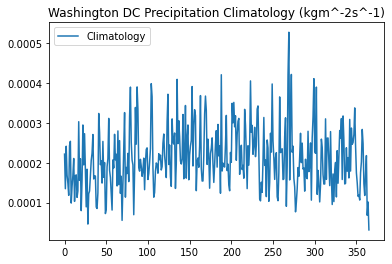

In [45]:
ds_ptclimo=ds_daily_climo.sel(lat=39,lon=-77,method='nearest')

plt.plot(ds_ptclimo)
             
plt.title('Washington DC Precipitation Daily Climatology (kgm^-2s^-1)')
plt.legend(['Daily Climatology'])
plt.savefig('/homes/areed29/CLIM997/summer22_research/washington_precip_dailyclimo')


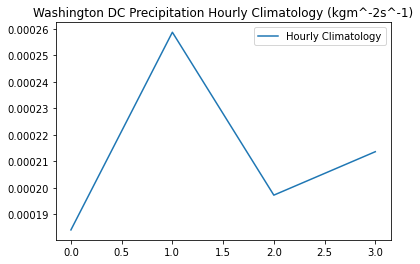

In [52]:
ds_ptclimo=ds_hourly_climo.sel(lat=39,lon=-77,method='nearest')

plt.plot(ds_ptclimo)
             
plt.title('Washington DC Precipitation Hourly Climatology (kgm^-2s^-1)')
plt.legend(['Hourly Climatology'])
plt.savefig('/homes/areed29/CLIM997/summer22_research/washington_precip_hourlyclimo')


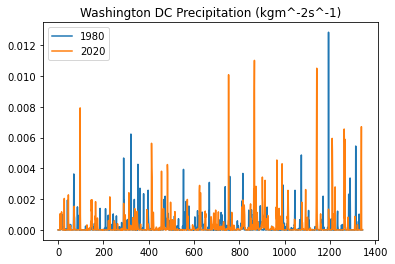

In [53]:
#ds_ptclimo=ds_climo.sel(lat=39,lon=-77,method='nearest')
ds_pt1980=dc_precip.sel(time=slice('1980-01-01','1980-12-01'))
ds_pt2020=dc_precip.sel(time=slice('2020-01-01','2020-12-01'))

#plt.plot(ds_ptclimo)
plt.plot(ds_pt1980)
plt.plot(ds_pt2020)                    

plt.title('Washington DC Precipitation (kgm^-2s^-1)')
plt.legend(['1980','2020'])
plt.savefig('/homes/areed29/CLIM997/summer22_research/washington_precip_comparison')


### Anomalies

In [54]:
ds_anoms_hourly=precip.groupby('time.hour')-ds_hourly_climo
ds_anoms_hourly


<xarray.DataArray 'PRECTOTCORR' (time: 60996, lat: 55, lon: 107)>
array([[[-3.97950498e-05, -3.84846498e-05, -3.79420671e-05, ...,
         -7.71496998e-05, -1.09201268e-04, -1.12444606e-04],
        [-3.63592299e-05, -3.50250302e-05, -3.44741820e-05, ...,
         -4.50512744e-05, -1.00733785e-04, -9.32784460e-05],
        [-3.46086490e-05, -3.24633074e-05, -3.14702120e-05, ...,
         -3.35666264e-05, -5.81783970e-05, -8.75898259e-05],
        ...,
        [-2.62312096e-04, -1.22019672e-04,  3.46257264e-04, ...,
         -2.18459609e-04, -2.45266943e-04, -2.62307061e-04],
        [-2.93221092e-05,  2.06052879e-04,  6.22109044e-04, ...,
         -2.08962767e-04, -2.41242567e-04, -2.54553626e-04],
        [ 5.55649516e-04,  2.67981872e-04,  1.48436637e-04, ...,
         -2.09912410e-04, -2.27785407e-04, -2.24201562e-04]],

       [[-4.71796193e-05, -4.52891254e-05, -4.50429325e-05, ...,
          1.23293430e-05, -1.94086606e-05, -3.21528059e-05],
        [-4.35527763e-05, -4.18023956e-05, -4.10466600e-05, ...,
          2.60198722e-05, -3.09907045e-05, -3.09623865e-05],
        [-4.13016714e-05, -3.93537739e-05, -3.83012557e-05, ...,
          4.75354318e-05,  6.71177986e-07, -2.89324234e-05],
...
          4.71858121e-03,  4.15570801e-03,  3.35440109e-03],
        [-1.91248924e-04, -1.42835779e-04, -4.81210300e-05, ...,
          4.89683263e-03,  4.20432584e-03,  3.75265907e-03],
        [ 9.90340195e-05,  5.68194082e-05, -6.99262309e-05, ...,
          4.20412980e-03,  3.72830220e-03,  3.32585629e-03]],

       [[-2.59929111e-05, -2.93885532e-05, -2.96856379e-05, ...,
          2.38315878e-03,  7.52308033e-03,  8.57910700e-03],
        [-3.04645255e-05, -2.85720889e-05, -2.77561958e-05, ...,
          7.05680065e-03,  9.98126622e-03,  9.69598908e-03],
        [-2.98791310e-05, -2.64365353e-05, -2.49426430e-05, ...,
          9.39533394e-03,  1.13152498e-02,  1.38675226e-02],
        ...,
        [-2.81159941e-04, -2.54171289e-04, -2.10238737e-04, ...,
          1.62968441e-04,  2.13017585e-04,  8.53383273e-04],
        [-2.75029801e-04, -1.95176894e-04, -3.10246833e-06, ...,
          1.21342158e-03,  1.43496832e-03,  2.43355008e-03],
        [-7.90066260e-05,  7.45598809e-05, -1.08678651e-05, ...,
          1.87839975e-03,  2.32605333e-03,  3.44056822e-03]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2021-09-30T18:00:00
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0
    hour     (time) int64 0 6 12 18 0 6 12 18 0 6 ... 12 18 0 6 12 18 0 6 12 18

In [56]:
ds_anoms_daily=precip.groupby('time.dayofyear')-ds_daily_climo
ds_anoms_daily


<xarray.DataArray 'PRECTOTCORR' (time: 60996, lat: 55, lon: 107)>
array([[[-1.35219438e-04, -1.43541562e-04, -1.54191090e-04, ...,
          1.91355139e-05, -1.95129469e-05, -2.39090095e-05],
        [-1.12196911e-04, -1.12646856e-04, -1.36188319e-04, ...,
          5.47443997e-05, -6.36293043e-06, -2.34652180e-06],
        [-9.13244294e-05, -8.45031245e-05, -1.03663544e-04, ...,
          6.93943584e-05,  4.12745794e-05,  8.80343578e-06],
        ...,
        [-5.34155755e-04, -3.99824057e-04,  4.02776641e-05, ...,
         -1.77504291e-04, -2.05917051e-04, -2.29842903e-04],
        [-3.20602674e-04, -9.70902620e-05,  3.30535579e-04, ...,
         -1.58603143e-04, -1.94550172e-04, -2.15791166e-04],
        [ 2.87528615e-04,  9.34363634e-05,  2.40831287e-05, ...,
         -1.53521294e-04, -1.77035690e-04, -1.83192620e-04]],

       [[-1.35219438e-04, -1.43541562e-04, -1.54191090e-04, ...,
          1.16265008e-04,  7.72082785e-05,  6.31203002e-05],
        [-1.12196911e-04, -1.12646856e-04, -1.36188319e-04, ...,
          1.33068621e-04,  6.98510412e-05,  6.70828740e-05],
        [-9.13244294e-05, -8.45031245e-05, -1.03663544e-04, ...,
          1.57091417e-04,  1.04759114e-04,  7.25252248e-05],
...
          4.60512796e-03,  4.01956448e-03,  3.21300700e-03],
        [-1.72933884e-04, -1.60200696e-04, -7.90923077e-05, ...,
          4.78553399e-03,  4.06803889e-03,  3.59098008e-03],
        [ 6.16068137e-05,  1.16745359e-05, -8.75400438e-05, ...,
          4.10492718e-03,  3.61254532e-03,  3.19229276e-03]],

       [[-3.36240810e-05, -2.65084964e-05, -2.21811406e-05, ...,
          2.33400194e-03,  7.40924571e-03,  8.45747907e-03],
        [-3.46430425e-05, -2.57987140e-05, -2.26863049e-05, ...,
          6.98625715e-03,  9.85278562e-03,  9.54539422e-03],
        [-4.08945452e-05, -3.11969306e-05, -2.69491611e-05, ...,
          9.31415148e-03,  1.11940671e-02,  1.37075000e-02],
        ...,
        [-2.01182847e-04, -2.30074860e-04, -2.23989016e-04, ...,
          3.58509424e-05,  6.73928007e-05,  7.04903039e-04],
        [-2.43066199e-04, -1.78104441e-04,  1.17004674e-05, ...,
          1.08435377e-03,  1.28575368e-03,  2.26111105e-03],
        [-7.58563983e-05,  9.33328993e-05,  1.38325559e-05, ...,
          1.75909675e-03,  2.19210703e-03,  3.29183252e-03]]],
      dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 ... 2021-09-30T18:00:00
  * lon        (lon) float64 -126.9 -126.2 -125.6 ... -61.88 -61.25 -60.62
  * lat        (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
    dayofyear  (time) int64 1 1 1 1 2 2 2 2 ... 272 272 272 272 273 273 273 273

Text(0.5, 1.0, 'Washington DC Precipitation Hourly Anomalies (kgm^-2s^-1)')

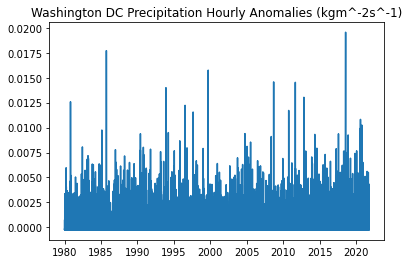

In [55]:
ds_anomspt=ds_anoms_hourly.sel(lat=39,lon=-77,method='nearest')
plt.plot(ds_anomspt['time'],ds_anomspt)
plt.title('Washington DC Precipitation Hourly Anomalies (kgm^-2s^-1)')


Text(0.5, 1.0, 'Washington DC Precipitation Daily Anomalies (kgm^-2s^-1)')

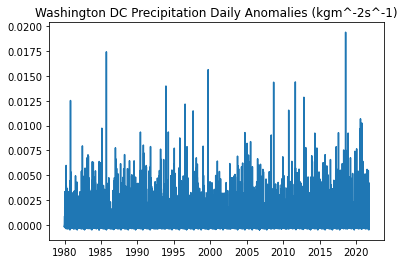

In [57]:
ds_anomspt=ds_anoms_daily.sel(lat=39,lon=-77,method='nearest')
plt.plot(ds_anomspt['time'],ds_anomspt)
plt.title('Washington DC Precipitation Daily Anomalies (kgm^-2s^-1)')


### Let's try New York City

In [58]:
ny_precip=precip.sel(lat=40.7812,lon=-73.9665,method='nearest')
ny_precip

<xarray.DataArray 'PRECTOTCORR' (time: 60996)>
array([0.000000e+00, 7.639500e-12, 2.391474e-10, ..., 2.162415e-06,
       3.308960e-07, 5.647307e-07], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2021-09-30T18:00:00
    lon      float64 -73.75
    lat      float64 41.0

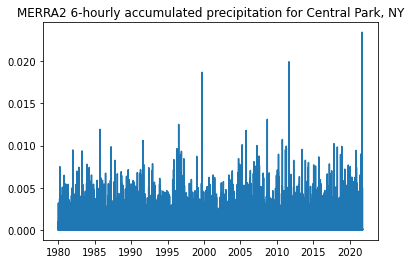

In [14]:
plt.plot(ny_precip['time'],ny_precip)
plt.title('MERRA2 6-hourly accumulated precipitation for Central Park, NY')
plt.savefig('/homes/areed29/CLIM997/summer22_research/ny_precip_6hourlysums')
#NYC

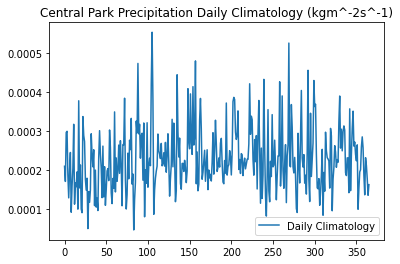

In [59]:
ds_ptclimo=ds_daily_climo.sel(lat=40.7812,lon=-73.9665,method='nearest')

plt.plot(ds_ptclimo)
             
plt.title('Central Park Precipitation Daily Climatology (kgm^-2s^-1)')
plt.legend(['Daily Climatology'])
plt.savefig('/homes/areed29/CLIM997/summer22_research/nyc_precip_dailyclimo')


### All data points

In [4]:
ds_monthly_climo=precip.groupby('time.month').mean(dim='time')
ds_monthly_climo

<xarray.DataArray 'PRECTOTCORR' (month: 12, lat: 55, lon: 107)>
array([[[9.0015295e-05, 7.9137157e-05, 7.4285002e-05, ...,
         7.6012358e-05, 6.8211899e-05, 6.9345828e-05],
        [7.7929210e-05, 7.0868300e-05, 6.7894369e-05, ...,
         8.0789985e-05, 7.4743242e-05, 7.4140262e-05],
        [7.1209979e-05, 6.5190245e-05, 6.2625884e-05, ...,
         8.5691019e-05, 8.0579848e-05, 7.9361511e-05],
        ...,
        [6.5016258e-04, 6.5867446e-04, 6.9598830e-04, ...,
         2.0128346e-04, 2.3116991e-04, 2.5952497e-04],
        [7.2218716e-04, 7.2045944e-04, 6.5264187e-04, ...,
         1.7932775e-04, 2.1646576e-04, 2.4060221e-04],
        [6.7532161e-04, 4.9539533e-04, 3.5714090e-04, ...,
         1.8235219e-04, 2.0394693e-04, 2.0970393e-04]],

       [[6.7755529e-05, 6.4947410e-05, 6.4251799e-05, ...,
         6.2317107e-05, 6.0731691e-05, 6.1260456e-05],
        [6.5266344e-05, 6.0254402e-05, 5.7567329e-05, ...,
         6.4924658e-05, 6.2246640e-05, 6.2187159e-05],
        [6.5297449e-05, 5.8867445e-05, 5.4463475e-05, ...,
         6.9071175e-05, 6.6305678e-05, 6.4550091e-05],
...
        [7.5849553e-04, 7.3735014e-04, 7.6305220e-04, ...,
         2.6221867e-04, 2.8931629e-04, 3.0824423e-04],
        [8.1131252e-04, 8.0129824e-04, 7.2992797e-04, ...,
         2.5066896e-04, 2.8748295e-04, 3.0455599e-04],
        [7.6010311e-04, 5.7255122e-04, 4.1792335e-04, ...,
         2.5974325e-04, 2.8227654e-04, 2.7953877e-04]],

       [[7.5617856e-05, 8.0403515e-05, 8.2877115e-05, ...,
         9.0514703e-05, 8.4778367e-05, 8.4347739e-05],
        [6.4007152e-05, 6.6249762e-05, 6.8905007e-05, ...,
         9.5080730e-05, 9.0022484e-05, 8.8272071e-05],
        [5.6728728e-05, 5.6918620e-05, 5.9180864e-05, ...,
         1.0134999e-04, 9.4217459e-05, 9.1236878e-05],
        ...,
        [6.5618305e-04, 6.5718114e-04, 6.7844387e-04, ...,
         2.3019647e-04, 2.5449309e-04, 2.7608647e-04],
        [7.1285362e-04, 7.0948602e-04, 6.4272946e-04, ...,
         2.1244303e-04, 2.4505699e-04, 2.6353609e-04],
        [6.6236581e-04, 4.9586996e-04, 3.6611955e-04, ...,
         2.1729586e-04, 2.3651111e-04, 2.3696985e-04]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

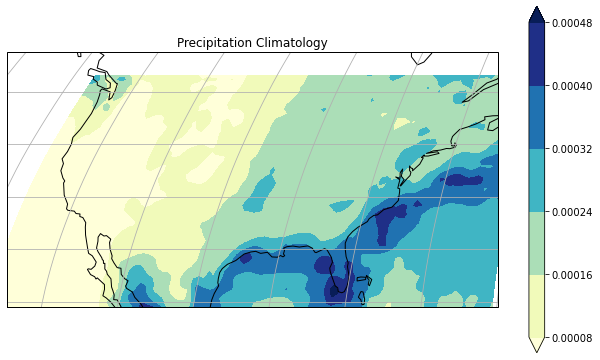

In [8]:
fig = plt.figure(figsize=(11,8.5))
ax=plt.axes(projection=ccrs.Robinson())
cs=ax.contourf(data_lon, data_lat, ds_monthly_climo[8,:,:],transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')
ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
cbar=plt.colorbar(cs, shrink=0.75)
plt.title('Precipitation Climatology')
plt.savefig('/homes/areed29/CLIM997/summer22_research/precip_climo')

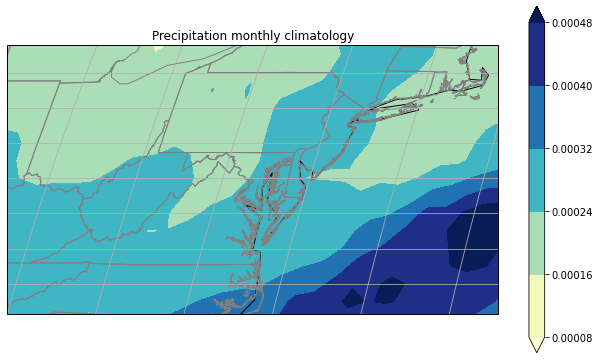

In [68]:
fig = plt.figure(figsize=(11,8.5))
ax=plt.axes(projection=ccrs.Robinson())
cs=ax.contourf(data_lon, data_lat, 
               ds_monthly_climo[6,:,:],
               transform = ccrs.PlateCarree(),cmap='YlGnBu',
               extend='both')
ax.set_extent([-69.8,-84,35.155,42.58])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp"
).geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')
cbar=plt.colorbar(cs, shrink=0.75)
plt.title('Precipitation monthly climatology')
plt.savefig('/homes/areed29/CLIM997/summer22_research/midatl_precip_climo')

### For fun, lets find Ida

In [86]:
for i in range(2021,2022,1):
    print(i)
    year_of_data = ds_anoms_daily.sel(time = slice(str(i)+"-01-01",str(i)+"-12-31")).values
    time_oneyear = ts_1.sel(time=slice(str(i)+"-01-01", str(i) +"-12-31")).values
    print(time_oneyear[-116])
    print(year_of_data[-116])#September 1st, Hour 18 6 hourly rainfall

2021
2021-09-02T00:00:00.000000000
[[-2.2335355e-05 -2.2244809e-05 -2.0303301e-05 ... -8.2216880e-05
  -8.3039820e-05 -9.1441339e-05]
 [-1.8395853e-05 -2.0289974e-05 -2.0617901e-05 ... -7.4721371e-05
  -7.9115169e-05 -8.9271889e-05]
 [-1.8482595e-05 -2.0309863e-05 -2.1752949e-05 ... -7.5067146e-05
  -8.2580744e-05 -9.4685471e-05]
 ...
 [-2.0157620e-04 -2.0092515e-04 -1.9425972e-04 ... -9.2300121e-05
  -1.7528622e-04 -2.4028565e-04]
 [-2.3262510e-04 -2.1898160e-04 -1.9919600e-04 ...  1.1201753e-04
  -2.0709704e-05 -2.1059538e-04]
 [-2.5613603e-04 -2.2205053e-04 -1.5328026e-04 ...  1.1105645e-04
  -5.1823314e-05 -1.6779985e-04]]


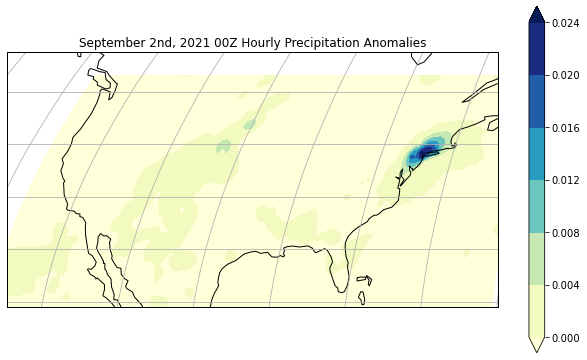

In [89]:
fig = plt.figure(figsize=(11,8.5))
ax=plt.axes(projection=ccrs.Robinson())
cs=ax.contourf(data_lon, data_lat, year_of_data[-116,:,:],transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')
ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
cbar=plt.colorbar(cs, shrink=0.75)
plt.title('September 2nd, 2021 00Z Hourly Precipitation Anomalies')
plt.savefig('/homes/areed29/CLIM997/summer22_research/Ida_precip_anoms')

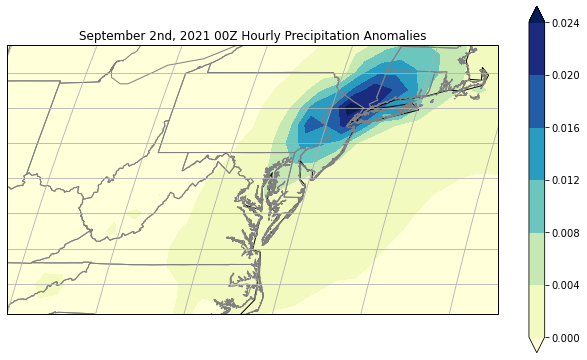

In [90]:
fig = plt.figure(figsize=(11,8.5))
ax=plt.axes(projection=ccrs.Robinson())
cs=ax.contourf(data_lon, data_lat, 
               year_of_data[-116,:,:],
               transform = ccrs.PlateCarree(),cmap='YlGnBu',
               extend='both')
ax.set_extent([-69.8,-84,35.155,42.58])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp"
).geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')
cbar=plt.colorbar(cs, shrink=0.75)
plt.title('September 2nd, 2021 00Z Hourly Precipitation Anomalies')
plt.savefig('/homes/areed29/CLIM997/summer22_research/midatl_ida_anoms')

### Precip Amounts for comparison

In [92]:
for i in range(2021,2022,1):
    print(i)
    year_of_data_amt = precip.sel(time = slice(str(i)+"-01-01",str(i)+"-12-31")).values
    time_oneyear = ts_1.sel(time=slice(str(i)+"-01-01", str(i) +"-12-31")).values
    print(time_oneyear[-116])
    print(year_of_data_amt[-116])#September 1st, Hour 18 6 hourly rainfall

2021
2021-09-02T00:00:00.000000000
[[4.14403621e-06 1.74815068e-06 1.71980355e-06 ... 1.34324655e-05
  6.62636012e-06 7.58073293e-06]
 [3.32447235e-06 7.92439096e-07 7.30360625e-07 ... 1.62348151e-05
  7.53044151e-06 7.24778511e-06]
 [2.90339813e-06 9.00647137e-07 8.79226718e-07 ... 1.79235358e-05
  8.59331340e-06 4.26732004e-06]
 ...
 [3.78812183e-06 5.77255560e-06 5.21659058e-06 ... 1.05552375e-04
  6.41196966e-05 3.48817557e-05]
 [4.73186083e-06 9.10615199e-06 4.99587622e-06 ... 3.04430723e-04
  2.19486654e-04 6.06998801e-05]
 [5.38976019e-06 6.34845492e-07 1.18653406e-06 ... 3.08617949e-04
  1.76481903e-04 7.26059079e-05]]


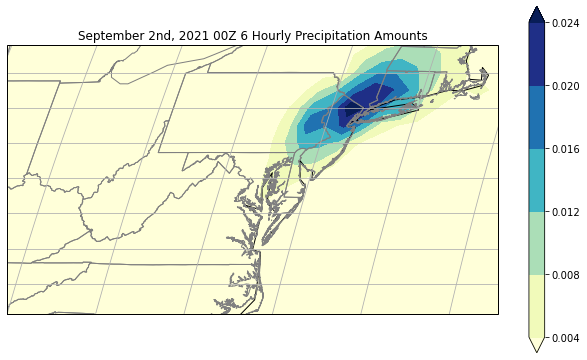

In [94]:
fig = plt.figure(figsize=(11,8.5))
ax=plt.axes(projection=ccrs.Robinson())
cs=ax.contourf(data_lon, data_lat, 
               year_of_data_amt[-116,:,:],
               transform = ccrs.PlateCarree(),cmap='YlGnBu',
               extend='both')
ax.set_extent([-69.8,-84,35.155,42.58])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp"
).geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')
cbar=plt.colorbar(cs, shrink=0.75)
plt.title('September 2nd, 2021 00Z 6 Hourly Precipitation Amounts')
plt.savefig('/homes/areed29/CLIM997/summer22_research/midatl_ida_amounts')

In [ ]:
### Amounts as high as (0.024 mm/21600 seconds; 518.4 mm/6 hours; 20.41 inches/6 hours?)

### Sorting, and finding dates that exceeded the 95th Percentile

In [10]:
## Washington, DC: latitude: 39 longitude: -77
for i in range(1980,2022,1):
    print(i)
    year_of_data = precip.sel(lat=38.8512,lon=-77.0402,method='nearest').sel(time = slice(str(i)+"-01-01",str(i)+"-12-31")).values
    #print(year_of_data)
    time_oneyear = ts_1.sel(time=slice(str(i)+"-01-01", str(i) +"-12-31")).values
    sorted_array = np.sort(year_of_data,axis=0)
    #print(sorted_array[1390])
    #print(len(sorted_array[1390]))
    percentile_95th = np.nanpercentile(sorted_array, q=95,axis=0)
    print(percentile_95th)
    i_match = np.asarray((np.where(year_of_data>=percentile_95th)))
    percentile_dates = time_oneyear[np.squeeze(i_match)]
    print(percentile_dates)


1980
0.0009567878209054469
['1980-01-05T06:00:00.000000000' '1980-01-11T06:00:00.000000000'
 '1980-01-12T00:00:00.000000000' '1980-01-18T06:00:00.000000000'
 '1980-01-18T12:00:00.000000000' '1980-01-22T06:00:00.000000000'
 '1980-02-16T06:00:00.000000000' '1980-02-22T06:00:00.000000000'
 '1980-02-25T06:00:00.000000000' '1980-03-01T18:00:00.000000000'
 '1980-03-13T06:00:00.000000000' '1980-03-13T12:00:00.000000000'
 '1980-03-13T18:00:00.000000000' '1980-03-21T06:00:00.000000000'
 '1980-03-25T00:00:00.000000000' '1980-03-29T00:00:00.000000000'
 '1980-03-29T06:00:00.000000000' '1980-03-31T00:00:00.000000000'
 '1980-03-31T06:00:00.000000000' '1980-04-04T06:00:00.000000000'
 '1980-04-09T00:00:00.000000000' '1980-04-09T06:00:00.000000000'
 '1980-04-09T12:00:00.000000000' '1980-04-14T00:00:00.000000000'
 '1980-04-26T18:00:00.000000000' '1980-04-27T06:00:00.000000000'
 '1980-04-27T18:00:00.000000000' '1980-04-28T00:00:00.000000000'
 '1980-04-28T06:00:00.000000000' '1980-05-01T00:00:00.000000000

### All CONUS data points

In [8]:
'''
for i in range(1980,1983,1):
    print(i)
    year_of_data = precip.sel(time = slice(str(i)+"-01-01",str(i)+"-12-31")).values
    #print(year_of_data)
    time_oneyear = ts_1.sel(time=slice(str(i)+"-01-01", str(i) +"-12-31")).values
    sorted_array = np.sort(year_of_data,axis=0)
    #print(sorted_array)
    percentile_95th = np.nanpercentile(sorted_array, q=95,axis=0)
    for k in range(0,nlats):
        for j in range(0,nlons):
            i_match = np.asarray((np.where(year_of_data[:,k,j]>=percentile_95th[k,j])))
            percentile_dates = time_oneyear[np.squeeze(i_match)]
'''

'\nfor i in range(1980,1983,1):\n    print(i)\n    year_of_data = precip.sel(time = slice(str(i)+"-01-01",str(i)+"-12-31")).values\n    #print(year_of_data)\n    time_oneyear = ts_1.sel(time=slice(str(i)+"-01-01", str(i) +"-12-31")).values\n    sorted_array = np.sort(year_of_data,axis=0)\n    #print(sorted_array)\n    percentile_95th = np.nanpercentile(sorted_array, q=95,axis=0)\n    for k in range(0,nlats):\n        for j in range(0,nlons):\n            i_match = np.asarray((np.where(year_of_data[:,k,j]>=percentile_95th[k,j])))\n            percentile_dates = time_oneyear[np.squeeze(i_match)]\n'